MACHINE LEARNING

LAB ASSESSMENT - 2

SAM ABRAHAM JOSHY 


20BCE0986

LAB L43+L44

1)Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis
based on a given set of training data samples. Read the training data from a .CSV file.

In [1]:
import csv

def consistent(hypothesis, sample):
    for i in range(len(hypothesis)):
        if hypothesis[i] != "?" and hypothesis[i] != sample[i]:
            return False
    return True
def find_s(data):
    most_specific = data[0]
    for sample in data:
        for i in range(len(most_specific)):
            if most_specific[i] != sample[i]:
                most_specific[i] = "?"
        for sample in data:
            if not consistent(most_specific, sample):
                most_specific = sample
                break
    return most_specific

with open('finds.csv') as file:
    data = [row for row in csv.reader(file)]
hypothesis = find_s(data)
print("Most Specific Hypothesis:", hypothesis)



Most Specific Hypothesis: ['?', '?', '?', 'Strong', 'Warm', '?', '?']


2)For a given set of training data examples stored in a .CSV file, implement and demonstrate
the Candidate-Elimination algorithm to output a description of the set of all hypotheses
consistent with the training examples.

In [2]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('finds.csv'))
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final, sep="\n")
print("\nFinal General_h:", g_final, sep="\n")

[['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'No' 'Yes']

Initialization of specific_h and general_h
['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Final Specific_h:
['Sunny' 'Warm' 'High' 'Strong' '?' '?']

Final General_h:
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


3. A XYZ company has conducting the research for tracking the real estate investments carried
out on last year to reveal the sales figures of new houses of different prices. Plot the data
and check for the linear relationship between attributes if any? and find the least square
regression line.

price $(xi) 160 280 180 200 260 240 220 170
Sales quantity (yi) 125 120 104 85 40 80 75 79

c:\Users\ASUS\AppData\Local\Programs\Python\Python38-32\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


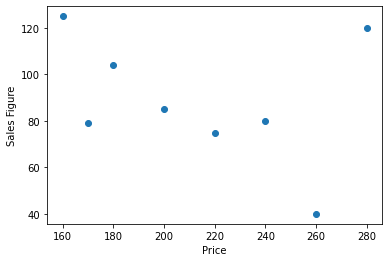

R^2: 0.08746074589613351
Least square regression line: y =  128.1764705882353  +  -0.18562091503267975 x


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
data = {'price': [160, 280, 180, 200, 260, 240, 220, 170],
        'sales_figure': [125, 120, 104, 85, 40, 80, 75, 79]
       }
data = pd.DataFrame(data)
X = data[['price']]
y = data['sales_figure']
plt.scatter(X, y)
plt.xlabel('Price')
plt.ylabel('Sales Figure')
plt.show()
model = LinearRegression()
model.fit(X, y)
print("R^2:", model.score(X, y))
b0, b1 = model.intercept_, model.coef_[0]
print("Least square regression line: y = ", b0, " + ", b1, "x")


4. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use
an appropriate data set for building the decision tree and apply this knowledge to classify a
new sample

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
data = pd.read_csv('id3.csv')
X = data.drop(columns=' buys_computer')
y = data[' buys_computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
new_sample = [[25, 75000, 1, 650]]
print("Class of new sample: ", clf.predict(new_sample))


Accuracy:  1.0
Class of new sample:  [0]


5. Write a program to demonstrate the working of the decision tree based CART algorithm
using GINI index calculation. Use an appropriate data set for building the decision tree and
apply this knowledge to classify a new sample.


In [5]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Classify a new sample
new_sample = np.array([[5, 3, 4, 2]])
prediction = clf.predict(new_sample)
print("Prediction for new sample: ", prediction)


Accuracy:  1.0
Prediction for new sample:  [2]
